# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve

%matplotlib inline

## Leemos nuestro archivo de entrada

In [2]:
df = pd.read_csv('reviews_sentiment.csv', sep = ';')
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

In [3]:
df.columns

Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')

In [4]:
df.sentimentValue.describe()

count    257.000000
mean       0.383849
std        0.897987
min       -2.276469
25%       -0.108144
50%        0.264091
75%        0.808384
max        3.264579
Name: sentimentValue, dtype: float64

In [5]:
#Codigo de clasificación
df['Star Rating'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [6]:
sentiment = df.loc[:,['wordcount', 'sentimentValue', 'Star Rating']]
sentiment.tail(9)

,wordcount,sentimentValue,Star Rating
248,1,2.220387,5
249,2,2.295086,5
250,2,2.333013,5
251,1,2.494902,5
252,3,2.814818,5
253,1,2.924393,5
254,1,2.924393,5
255,1,2.924393,5
256,3,3.264579,5


## Rápidas visualizaciones y análisis

In [7]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wordcount       257 non-null    int64  
 1   sentimentValue  257 non-null    float64
 2   Star Rating     257 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.1 KB


In [8]:
sentiment.isnull().sum()

wordcount         0
sentimentValue    0
Star Rating       0
dtype: int64

In [9]:
sentiment.describe()

,wordcount,sentimentValue,Star Rating
count,257.000000,257.000000,257.000000
mean,11.501946,0.383849,3.420233
std,13.159812,0.897987,1.409531
min,1.000000,-2.276469,1.000000
25%,3.000000,-0.108144,3.000000
50%,7.000000,0.264091,3.000000
75%,16.000000,0.808384,5.000000
max,103.000000,3.264579,5.000000


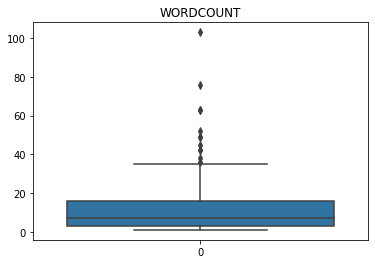

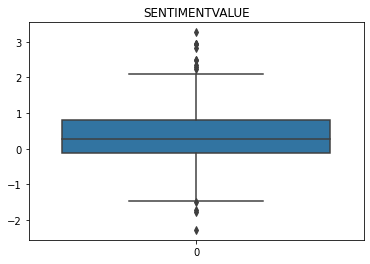

In [10]:
for col in sentiment.columns[:-1]:
    sns.boxplot(data=sentiment[col] )
    plt.title(col.upper())
    plt.show()

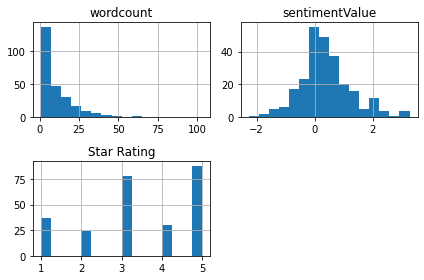

In [11]:
sentiment.hist(bins=16)
plt.tight_layout()
plt.show();

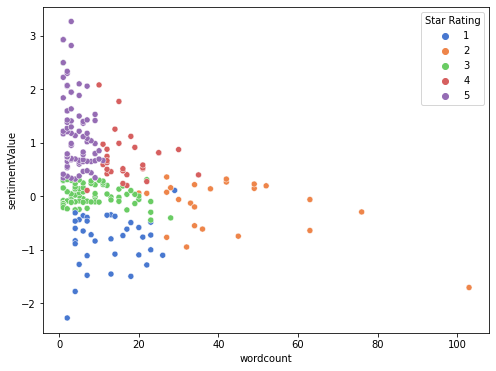

In [12]:
plt.figure( figsize=(8,6))
sns.scatterplot(data=sentiment, x="wordcount", y="sentimentValue", hue="Star Rating",  palette="muted");

## Preparamos el dataset

In [13]:
X = sentiment.drop('Star Rating', axis=1)
X

,wordcount,sentimentValue
0,23,-0.486389
1,20,-0.586187
2,4,-0.602240
3,17,-0.616271
4,6,-0.651784
...,...,...
252,3,2.814818
253,1,2.924393
254,1,2.924393
255,1,2.924393


In [14]:
y = sentiment['Star Rating']
y[25:35]

25    1
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
Name: Star Rating, dtype: int64

In [15]:
#Split train/ test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)


In [16]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (205, 2)
Training Labels Shape: (205,)
Testing Features Shape: (52, 2)
Testing Labels Shape: (52,)


In [17]:
#Standar 

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)

X_train_scaler.mean(), X_train_scaler.std()

(2.0579743871100462e-17, 1.0)

In [18]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler[25:35]

array([[ 0.84010652, -1.94064495],
       [-0.17204713, -0.06862892],
       [-0.71705295,  0.378319  ],
       [-0.79491092,  2.90487524],
       [-0.17204713,  0.29904833],
       [-0.32776308,  1.90497894],
       [ 0.06152679,  0.30376895],
       [-0.561337  , -1.41986268],
       [ 0.06152679,  0.26040398],
       [-0.79491092, -0.62160575]])

## Creamos el Modelo

In [20]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaler, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [21]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

## Resultados obtenidos

In [22]:
train_predict = knn.predict(X_train_scaler)
train_predict

array([3, 5, 3, 2, 3, 5, 5, 4, 5, 4, 3, 4, 3, 5, 5, 5, 3, 2, 3, 3, 4, 2,
       3, 3, 3, 5, 3, 3, 5, 5, 2, 5, 3, 5, 1, 3, 5, 4, 3, 3, 2, 1, 5, 4,
       2, 1, 1, 2, 3, 3, 1, 5, 3, 5, 3, 3, 3, 3, 4, 5, 3, 3, 2, 5, 3, 5,
       2, 5, 5, 3, 5, 3, 1, 1, 3, 3, 3, 5, 5, 3, 2, 3, 4, 2, 1, 5, 5, 2,
       3, 1, 3, 2, 4, 5, 3, 3, 3, 5, 5, 5, 3, 5, 3, 3, 5, 5, 2, 3, 4, 1,
       5, 5, 1, 3, 5, 3, 3, 5, 3, 3, 4, 5, 1, 3, 3, 2, 5, 5, 5, 3, 3, 3,
       2, 4, 1, 5, 5, 3, 3, 1, 5, 5, 1, 1, 1, 3, 5, 2, 1, 5, 3, 5, 2, 5,
       5, 3, 3, 3, 3, 5, 5, 5, 5, 5, 4, 5, 5, 3, 5, 3, 1, 1, 3, 5, 3, 5,
       5, 5, 5, 2, 3, 5, 1, 3, 4, 3, 5, 3, 3, 3, 1, 5, 3, 5, 5, 3, 5, 1,
       5, 3, 3, 1, 3, 5, 3], dtype=int64)

In [23]:
test_predict = knn.predict(X_test_scaler)
test_predict

array([3, 5, 3, 2, 1, 1, 5, 1, 3, 3, 3, 3, 2, 3, 3, 5, 3, 3, 5, 5, 1, 3,
       5, 5, 5, 1, 3, 5, 5, 5, 5, 5, 1, 5, 3, 1, 5, 2, 3, 1, 5, 2, 5, 3,
       3, 2, 4, 5, 1, 4, 5, 5], dtype=int64)

In [24]:
#Accuracy
accuracy_train = accuracy_score(y_train, train_predict)
accuracy_test = accuracy_score(y_test, test_predict)
accuracy_train, accuracy_test

(0.8731707317073171, 0.7884615384615384)

In [25]:
#Confusion matrix
mx_test = confusion_matrix(y_test, test_predict)
mx_test

array([[ 8,  1,  1,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 1,  1, 12,  0,  0],
       [ 0,  1,  1,  2,  3],
       [ 0,  0,  2,  0, 17]], dtype=int64)

<AxesSubplot:>

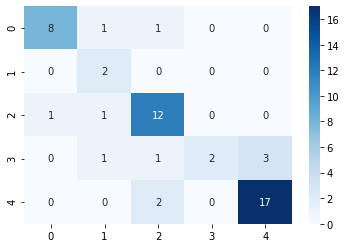

In [29]:
sns.heatmap(mx_test, annot=True, cmap='Blues')

In [30]:
f1_test = f1_score(y_test, test_predict,average='micro')
f1_test

0.7884615384615384

## ¿Cómo obtener el mejor valor de k?

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [3,5,10,15,20,20]}

knn =  KNeighborsClassifier()

grid_knn = GridSearchCV(knn,
                        parameters,
                        scoring = 'accuracy',
                        cv = 10)

grid_tree.fit(X_train_scaler, y_train)
print(grid_tree.best_score_)
print(grid_tree.best_params_)

In [99]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaler, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [100]:
train_predict = knn.predict(X_train_scaler)
test_predict = knn.predict(X_test_scaler)
accuracy_train = accuracy_score(y_train, train_predict)
accuracy_test = accuracy_score(y_test, test_predict)

In [101]:
accuracy_train, accuracy_test

(0.8975609756097561, 0.8653846153846154)

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1